In [1]:
from demo  import jdt_db
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import time
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

In [19]:
def ABC80(data,listname):
    data.sort_values(by =listname,ascending=False,inplace=True)
    plt.figure(figsize = (20,12))
    data[listname].plot.bar(color = '#DC143C',alpha = 0.8,width = 0.6,rot = 0)
    p = data[listname].cumsum()/data[listname].sum()
    key = p[p>0.8].index[0]
    key_num = data.index.tolist().index(key)
    print('超过累计占比80%节点值的索引为:{}'.format(key_num))
    p.plot(kind = 'line',style = '--o',color = '#7FFF00',secondary_y = True)
    plt.axvline(key_num,linestyle = '--',color = '#EA0000')
    plt.text(key_num,p[key_num],'累计占比:{:.2f}%'.format(p[key_num]*100),color = '#3C3C3C',fontdict = {'size':15})

In [3]:
userupcount_sql = "    SELECT   main.conference_class_id,   main.cname,   count(user_id) count  FROM   (SELECT   c.user_id  user_id,   c.user_name user_name,   b.conference_name  as conference_name,   c.user_upgrade_group AS user_upgrade_group,   c.created_at  created_at,   b.is_offline   is_offline,   b.conference_class_id   conference_class_id ,   b.id id,   d.`name` cname    FROM   jdt_conference AS a   LEFT JOIN jdt_conference_order as b on a.id = b.conference_id   LEFT JOIN jdt_user_upgrade_log AS c ON c.user_id = b.buyer_id   LEFT JOIN jdt_conference_class as d on a.conference_class_id = d.id   WHERE   c.user_upgrade_group in (2,3,4,5)    AND b.order_state IN ( 12, 14 )   AND c.created_at >= a.start_time   AND c.created_at <a.end_time   AND a.`status` = 2   AND a.start_time >='2022-07-01 00:00:00'   AND a.start_time <'2022-08-01 00:00:00'   GROUP BY   b.buyer_id,   c.user_upgrade_group   ) as main    GROUP BY   main.conference_class_id "
joinusercount_sql = " SELECT   main1.buyer_id,   main1.buyer_name,   main1.conference_class_id,   main1.`name`,   main2.cout   FROM   (SELECT    a.conference_class_id,   a.id,   a.conference_name,   b.buyer_id,   b.buyer_name,   c.`name`   FROM   jdt_conference as a  LEFT JOIN  jdt_conference_order as b on a.id = b.conference_id   LEFT JOIN jdt_conference_class as c on c.id = a.conference_class_id   WHERE   b.created_at >='2022-07-01 00:00:00'   AND b.created_at <'2022-08-01 00:00:00'   AND b.order_state in (12,14)     AND a.`status` = 2   GROUP BY   b.buyer_id,   b.conference_class_id   )  as main1      LEFT JOIN       (   SELECT   pid,   count(id) cout   FROM   jdt_user   WHERE   jointime >= 1656604800   AND jointime < 1659283200   GROUP BY   pid   ) as main2  on main2.pid = main1.buyer_id  "

In [4]:
joinusercount = jdt_db(joinusercount_sql)
userupcount = jdt_db(userupcount_sql)

D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


4.328914642333984


D:\anaconda\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


1.1525318622589111


In [5]:
joinusercount_drop = joinusercount.groupby('buyer_id').agg({'buyer_name':'count'})

In [6]:
joinusercount_drop.rename(columns={'buyer_name':'kecheng'},inplace=True)

In [7]:
joinusercount = pd.merge(joinusercount,joinusercount_drop,on='buyer_id',how='left')

In [8]:
joinusercount['kecheng'].isnull().any()

False

In [9]:
joinusercount['cout']=joinusercount['cout'].fillna(0)

In [10]:
joinusercount['people'] = joinusercount['cout']   / joinusercount['kecheng']

In [11]:
joingroup = joinusercount.groupby(['name']).agg({'people':'sum','buyer_id':'count'})

In [12]:
joingroup.rename(columns={'conference_class_id':'班型ID','name':'班型名称','people':'拉新人数','buyer_id':'参会人数'},inplace=True)

In [13]:
joingroup.sort_values(by='拉新人数',ascending=False, inplace=True)  

超过累计占比80%节点值的索引为:4


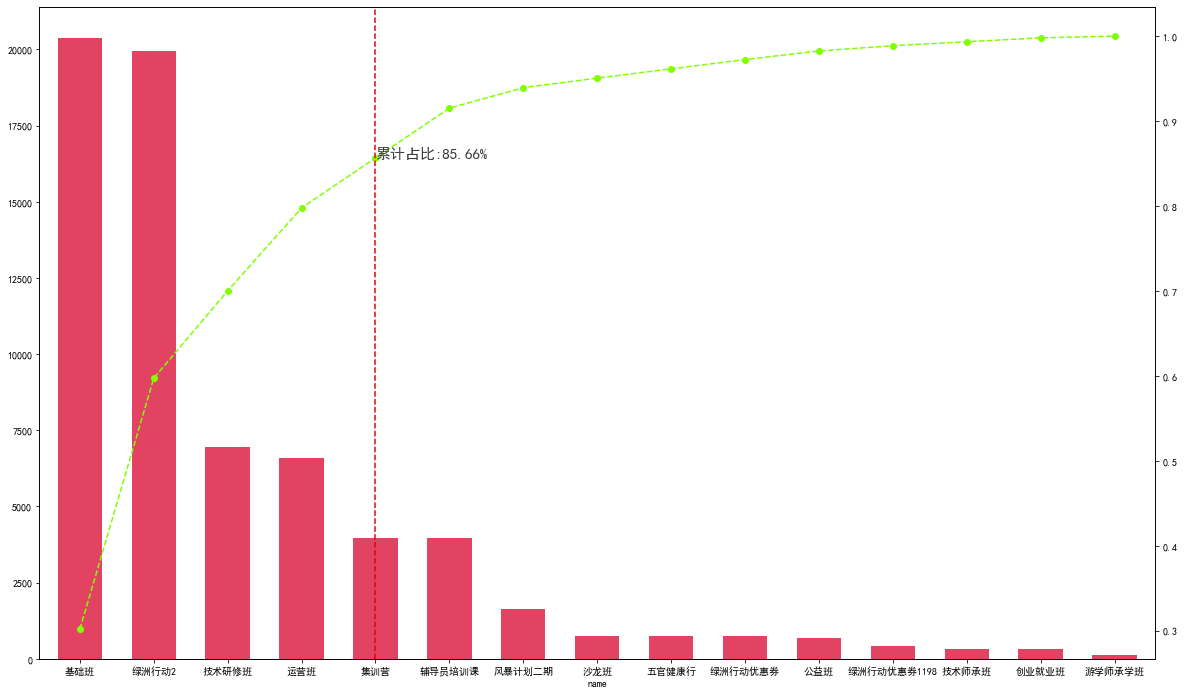

In [20]:
name = '拉新人数'
ABC80(joingroup,name)

超过累计占比80%节点值的索引为:0


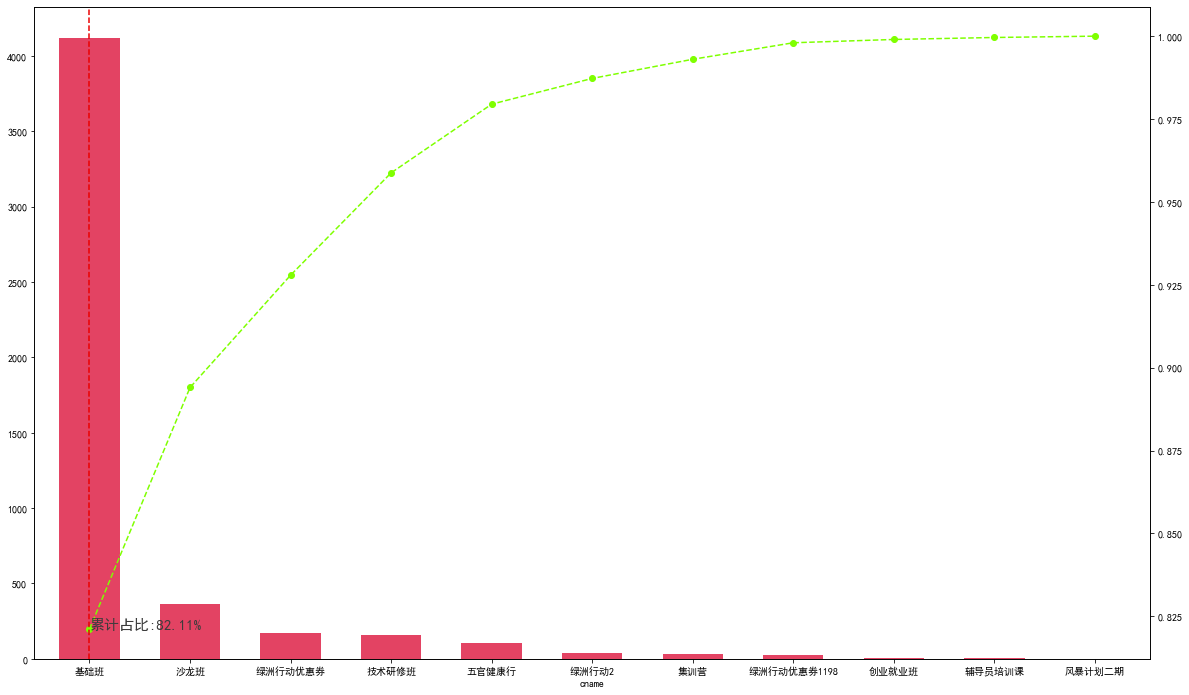

In [21]:
name = 'count'
# userupcount.set_index(['cname'],inplace=True)
ABC80(userupcount,name)